In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['GOOGL', 'META', 'AMZN']

In [3]:
news_tables = {}

In [4]:
for ticker in tickers:
    url = finviz_url+ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = 'news-table')
    news_tables[ticker] = news_table

In [5]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.get_text()
        date_data = row.td.text.split(' ')

        if len(date_data) ==1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

In [6]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [7]:
df

ticker       date     time  \
0    GOOGL  May-15-23  06:36PM   
1    GOOGL  May-15-23  06:16PM   
2    GOOGL  May-15-23  04:13PM   
3    GOOGL  May-15-23  03:45PM   
4    GOOGL  May-15-23  02:03PM   
..     ...        ...      ...   
295   AMZN  May-10-23  07:42AM   
296   AMZN  May-10-23  07:29AM   
297   AMZN  May-10-23  06:58AM   
298   AMZN  May-10-23  05:53AM   
299   AMZN  May-10-23  05:05AM   

                                                 title  
0    UPDATE 1-OpenAI readies new open-source AI mod...  
1    Google Billionaire Sergey Brin Gifts $600 Mill...  
2    Google's AI Investments Continue to Be a Major...  
3    Chart of the Day: Search for Bullishness Is Ov...  
4    Uber Stock Riding High On Deals With Amazon, G...  
..                                                 ...  
295  Zacks Investment Ideas feature highlights: App...  
296      Q1 2023 Clean Energy Fuels Corp Earnings Call  
297  Is Amazon's AI-Powered Supply Chain the Secret...  
298             Heres Why Amazon.com (AMZN) Rose in Q1  
299  Why AI Is the Next Big Thing in Investing, and...  

[300 rows x 4 columns]

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
vader = SentimentIntensityAnalyzer()

In [10]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

In [11]:
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")

In [12]:
mean_df

date    2023-05-04  2023-05-05  2023-05-06  2023-05-08  2023-05-09  \
ticker                                                               
AMZN           NaN         NaN         NaN         NaN         NaN   
GOOGL          NaN         NaN         NaN         NaN         NaN   
META       -0.0837      0.0404    0.067433    0.028691    0.077571   

date    2023-05-10  2023-05-11  2023-05-12  2023-05-13  2023-05-14  2023-05-15  
ticker                                                                          
AMZN      0.249265    0.153853    0.194414    0.264557    0.326512    0.140309  
GOOGL     0.244754   -0.019425    0.129165   -0.238500    0.000000    0.064009  
META      0.020242    0.110720    0.059050    0.000000    0.405700    0.092062

<Figure size 864x576 with 0 Axes>

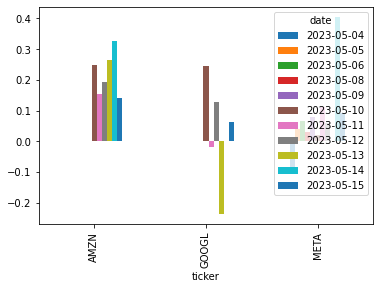

In [16]:
plt.figure(figsize=(12,8))
mean_df.plot(kind='bar')
plt.show()